## Churn Analysis

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('telecom_churn.csv')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [87]:
df.duplicated().sum()

0

In [88]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

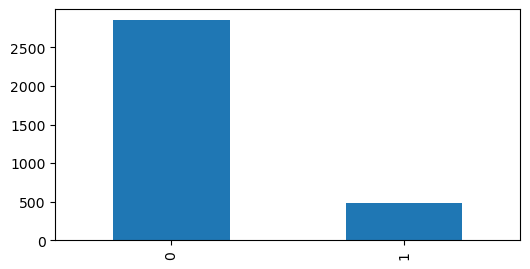

In [89]:
plt.figure(figsize=(6,3))
df['Churn'].value_counts().plot(kind='bar')
plt.show()

In [90]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [91]:
# function to find the counts of a category

def value_count(col):
    return df[col].value_counts()

value_count('Churn')

0    2850
1     483
Name: Churn, dtype: int64

In [92]:
value_count('ContractRenewal')

1    3010
0     323
Name: ContractRenewal, dtype: int64

In [93]:
value_count('DataPlan')

0    2411
1     922
Name: DataPlan, dtype: int64

In [94]:
 # replace 1,0 in DataPlan with yes, and no
    
def rep(col_name):
    if col_name==1:
        return 'yes'
    else:
        return 'no'
    
df['DataPlan'] = df['DataPlan'].apply(rep)

In [95]:
df


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,yes,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,yes,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,no,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,no,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,no,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,yes,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,no,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,no,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,no,0.00,2,213.8,105,50.0,7.98,5.0


In [96]:
# now replacing the 'ContractRenewal' column 

df['ContractRenewal'] = df['ContractRenewal'].apply(rep)

In [97]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,yes,yes,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,yes,yes,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,yes,no,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,no,no,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,no,no,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,yes,yes,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,yes,no,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,yes,no,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,no,no,0.00,2,213.8,105,50.0,7.98,5.0


In [98]:
# Now replacing the 'Churn column'

df['Churn'] =df['Churn'].apply(rep) 

In [99]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,no,128,yes,yes,2.7,1,265.1,110,89.0,9.87,10.0
1,no,107,yes,yes,3.7,1,161.6,123,82.0,9.78,13.7
2,no,137,yes,no,0.0,0,243.4,114,52.0,6.06,12.2
3,no,84,no,no,0.0,2,299.4,71,57.0,3.10,6.6
4,no,75,no,no,0.0,3,166.7,113,41.0,7.42,10.1


In [100]:
value_count('CustServCalls')

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: CustServCalls, dtype: int64

In [101]:
# Here We start Analysis 

In [102]:
# 1- HOW MANY CUSTOMERS HAVE BEEN CHURN OUT
value_count('Churn')

no     2850
yes     483
Name: Churn, dtype: int64

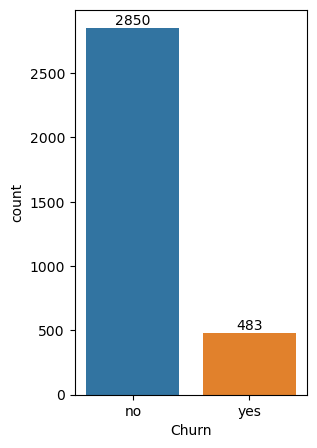

In [103]:
plt.figure(figsize=(3,5))

ax = sns.countplot(x='Churn',data = df)
ax.bar_label(ax.containers[0])
plt.show()

In [104]:
# to see these values in percentages we do this

# we can't directly apply the pie function because this is a string variables, So, first we do group by and find the count 
group = df.groupby("Churn").agg({'Churn':"count"})
group

,Churn
Churn,
no,2850
yes,483


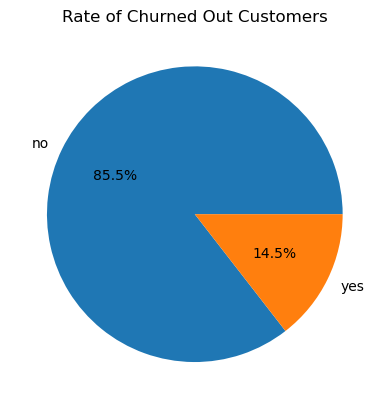

In [105]:
# now we check the percentage 
plt.pie(group['Churn'],labels=group.index,autopct="%.1f%%")
plt.title('Rate of Churned Out Customers')
plt.show()

## 1- From here we conclude that 14.5 % of Customers has Churned Out

In [106]:
# NOW WE CAN EXPLORE THE REASON OF BEING CHURNED OUT

In [107]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,no,128,yes,yes,2.70,1,265.1,110,89.0,9.87,10.0
1,no,107,yes,yes,3.70,1,161.6,123,82.0,9.78,13.7
2,no,137,yes,no,0.00,0,243.4,114,52.0,6.06,12.2
3,no,84,no,no,0.00,2,299.4,71,57.0,3.10,6.6
4,no,75,no,no,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,no,192,yes,yes,2.67,2,156.2,77,71.7,10.78,9.9
3329,no,68,yes,no,0.34,3,231.1,57,56.4,7.67,9.6
3330,no,28,yes,no,0.00,2,180.8,109,56.0,14.44,14.1
3331,no,184,no,no,0.00,2,213.8,105,50.0,7.98,5.0


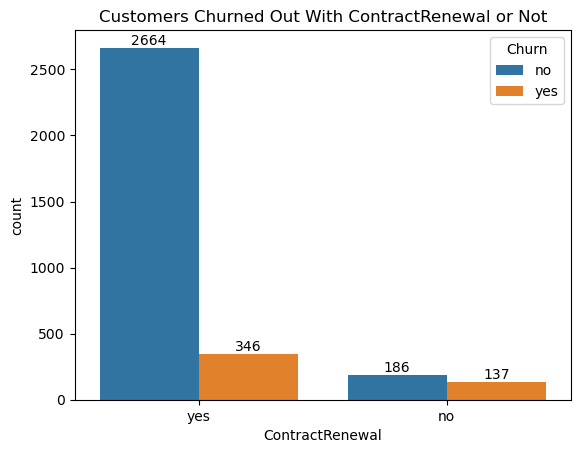

In [109]:

ax = sns.countplot(x='ContractRenewal',data=df,hue='Churn')
plt.title('Customers Churned Out With ContractRenewal or Not')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

A significantly larger number of customers who renewed their contracts (yes)
did not churn (2664 did not churn, compared to 346 who churned).

Among customers who did not renew their contracts (no), there is a more
balanced split, with 186 not churning and 137 churning.

This suggests that contract renewal has a strong association with 
customer retention, as a majority of customers who renew their contracts 
do not churn.

However, a significant portion of those who do not renew are more likely to churn.

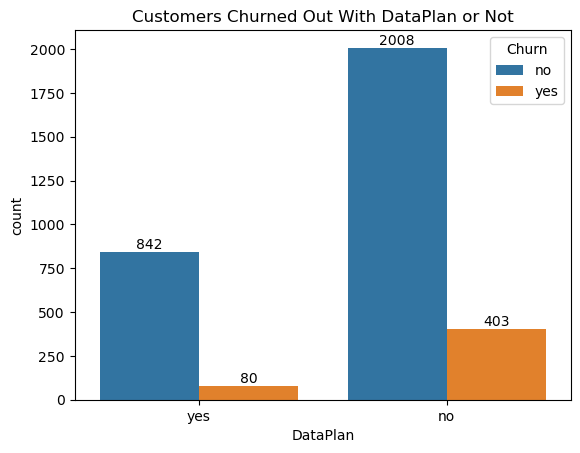

In [110]:
ax = sns.countplot(x='DataPlan',data=df,hue='Churn')
plt.title('Customers Churned Out With DataPlan or Not')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

large number of customer they had no data plan had churn, where as customer they have data plan has less customer has churned out as compared to no dataplan

<AxesSubplot:xlabel='CustServCalls', ylabel='count'>

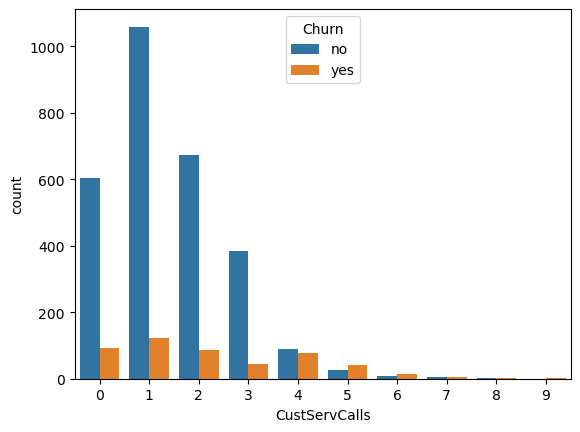

In [114]:
sns.countplot(x='CustServCalls',data=df,hue='Churn')

Here we can see that customers they are calling more than three time are churnning out

In [116]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,no,128,yes,yes,2.7,1,265.1,110,89.0,9.87,10.0
1,no,107,yes,yes,3.7,1,161.6,123,82.0,9.78,13.7
2,no,137,yes,no,0.0,0,243.4,114,52.0,6.06,12.2
3,no,84,no,no,0.0,2,299.4,71,57.0,3.10,6.6
4,no,75,no,no,0.0,3,166.7,113,41.0,7.42,10.1


<AxesSubplot:xlabel='DataUsage', ylabel='Count'>

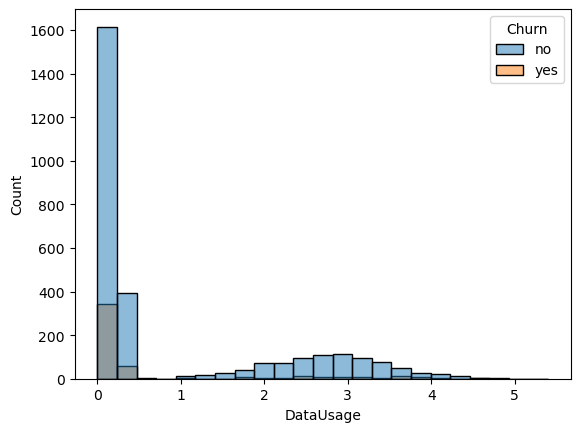

In [136]:
sns.histplot(x='DataUsage',data=df,hue='Churn')

Those people churn out they actually utilize 0 data, as compared to those who utilize data

<AxesSubplot:xlabel='DayMins', ylabel='Count'>

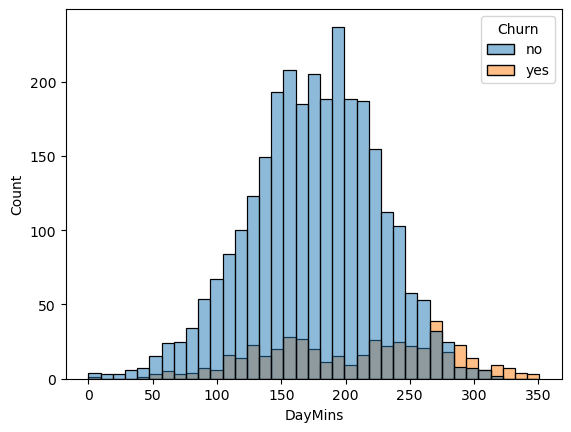

In [139]:
sns.histplot(x='DayMins',data=df,hue='Churn')

Those people who spend more than 250 minutes on a call being churn out

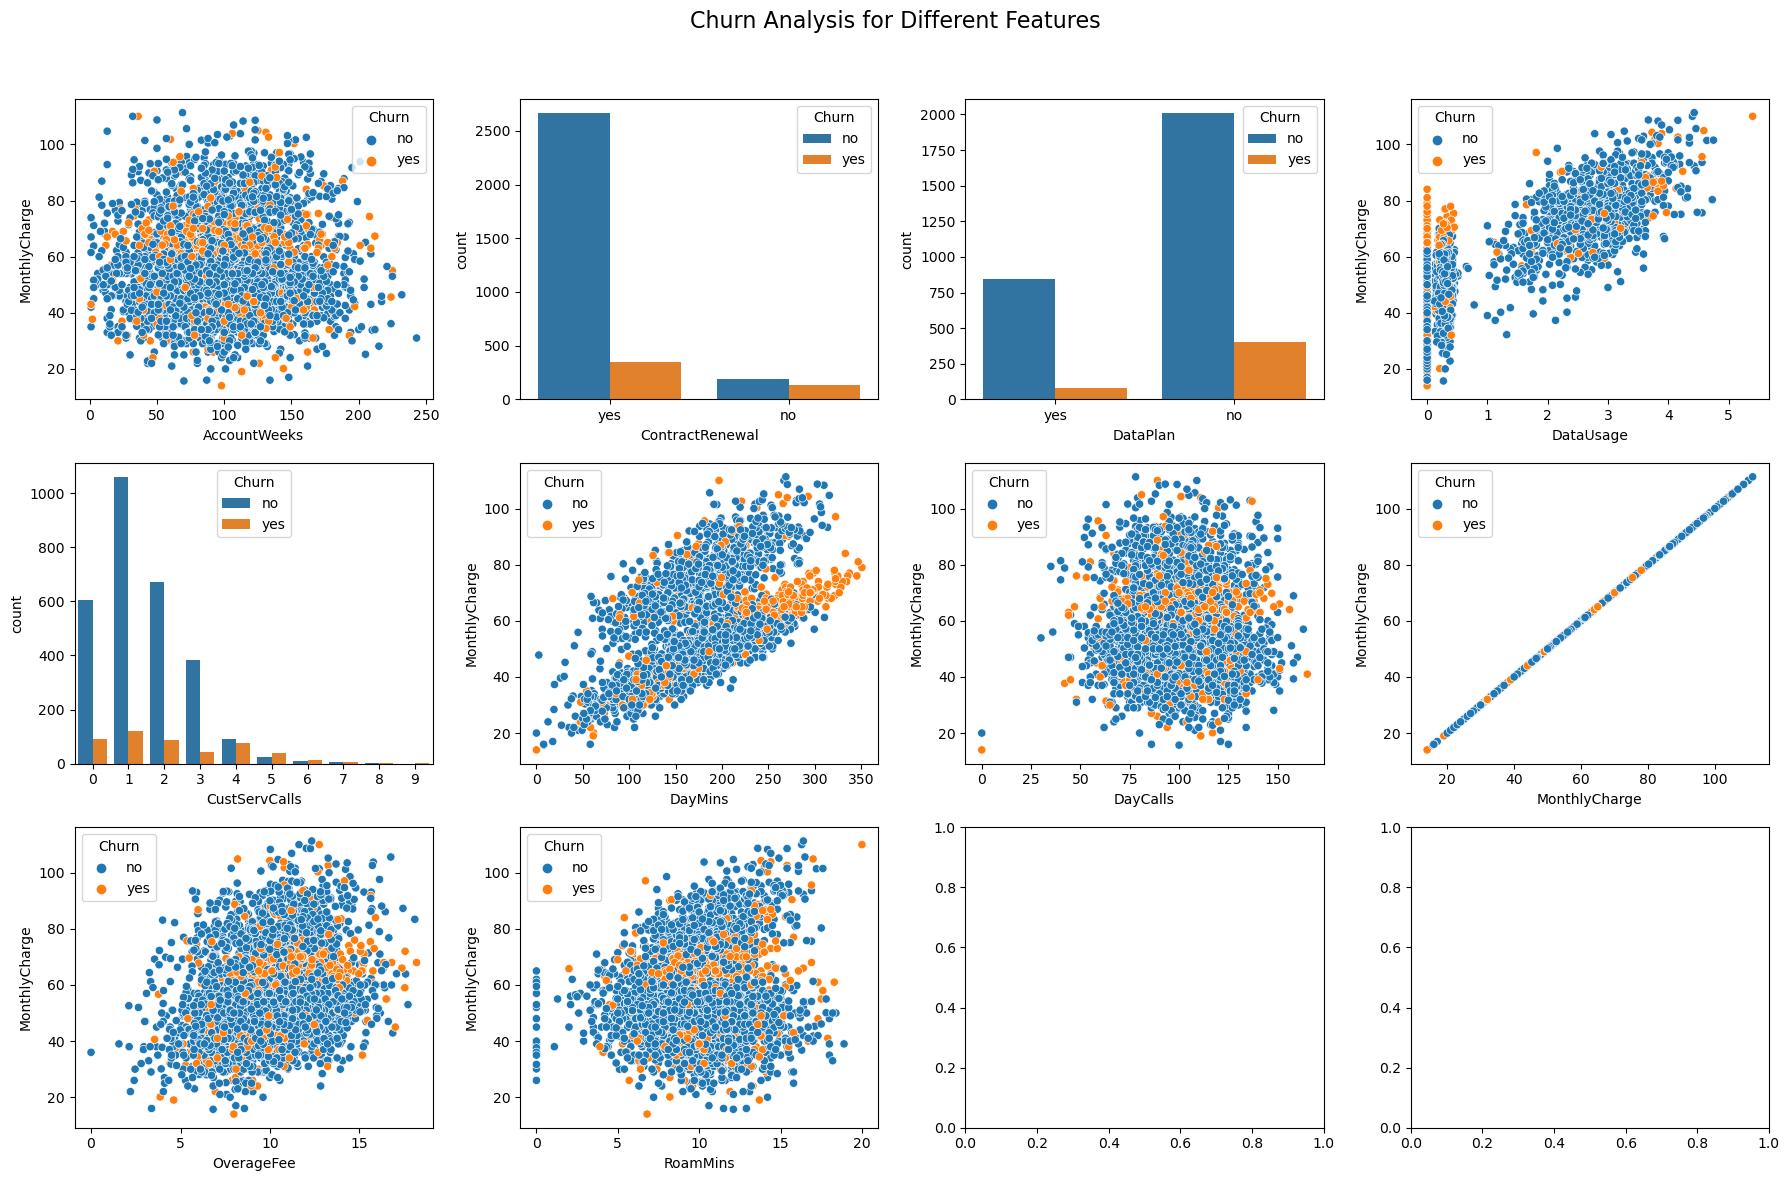

In [145]:
fig, axes = plt.subplots(3, 4, figsize=(18, 12))

# List of columns to plot
columns = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 
           'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

# Loop through columns and create a subplot for each one
for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    if df[column].dtype == 'object' or df[column].nunique() <= 10:
        # If the column is categorical or has few unique values, use countplot
        sns.countplot(x=column, data=df, hue='Churn', ax=axes[row, col])
    else:
        # For numerical columns, use scatterplot
        sns.scatterplot(x=column, y='MonthlyCharge', data=df, hue='Churn', ax=axes[row, col])
        
# Set plot title and adjust layout
fig.suptitle('Churn Analysis for Different Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()